# Imports

In [2]:
import time
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns  # visualisation
from sklearn.model_selection import cross_val_score,GridSearchCV, cross_validate
from sklearn import neighbors
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt  # visualisation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor

# Leer archivo

In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/wind_ava.csv'
df = pd.read_csv(file_path)
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,datetime,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2,2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986


# EDA

## Análisis de atributos e instancias



In [4]:
num_instances, num_features = df.shape
print("Number of instances: ", num_instances)
print("Number of features: ", num_features)

Number of instances:  4748
Number of features:  552


## Análisis de cada atributo
Esto es un análisi

In [5]:
variable_types = df.dtypes
columns = df.columns
missing_values = df.isnull().sum()
print("Tipos de variables:")
for i in range(len(variable_types)):
    if variable_types[i] in ['float64', 'int64']:
        print(columns[i], ": ", variable_types[i], "-> numérico. || Missing values: ", missing_values[i])
    else:
        print(columns[i], ": ", variable_types[i], "-> categórico. || Missing values: ", missing_values[i])

Tipos de variables:
datetime :  object -> categórico. || Missing values:  0
energy :  float64 -> numérico. || Missing values:  0
p54.162.1 :  float64 -> numérico. || Missing values:  0
p54.162.2 :  float64 -> numérico. || Missing values:  0
p54.162.3 :  float64 -> numérico. || Missing values:  0
p54.162.4 :  float64 -> numérico. || Missing values:  0
p54.162.5 :  float64 -> numérico. || Missing values:  0
p54.162.6 :  float64 -> numérico. || Missing values:  0
p54.162.7 :  float64 -> numérico. || Missing values:  0
p54.162.8 :  float64 -> numérico. || Missing values:  0
p54.162.9 :  float64 -> numérico. || Missing values:  0
p54.162.10 :  float64 -> numérico. || Missing values:  0
p54.162.11 :  float64 -> numérico. || Missing values:  0
p54.162.12 :  float64 -> numérico. || Missing values:  0
p54.162.13 :  float64 -> numérico. || Missing values:  0
p54.162.14 :  float64 -> numérico. || Missing values:  0
p54.162.15 :  float64 -> numérico. || Missing values:  0
p54.162.16 :  float64 -> 

## Atributos duplicados, vacíos y constantes

In [6]:
# Mostrar columnas con valores faltantes
print("Columnas con valores faltantes:")
if missing_values.sum() == 0:
    print("No hay columnas con valores faltantes")
else:
    for col in columns:
        if missing_values[col] > 0:
            print(col, ": ", missing_values[col])

# Columnas constantes
constant_columns = df.columns[df.nunique() == 1]
print("Columnas constantes:")
if len(constant_columns) == 0:
    print("No hay columnas constantes")
else:
    for col in constant_columns:
        print(col)

# Filas duplicadas
duplicated_rows = df.duplicated()
print("Filas duplicadas: ", duplicated_rows.sum())

# Filas vacías
empty_rows = df.isnull().all(axis=1)
print("Filas vacías: ", empty_rows.sum())

Columnas con valores faltantes:
No hay columnas con valores faltantes
Columnas constantes:
No hay columnas constantes
Filas duplicadas:  0
Filas vacías:  0


## Naturaleza del problema

In [7]:
problem_type = "Problema de Regresión" if df['energy'].dtype in ['float64', 'int64'] else "Problema de Clasificación"
print(f"Naturaleza del problema: {problem_type}")

Naturaleza del problema: Problema de Regresión


## Selección de columnas relevantes

In [8]:
# Eliminación de variables meteorológicas no correspondientes a la localización 13
print("Columnas relevantes:")
relevant_columns = [col for col in df.columns if col.endswith(".13") or col in ['datetime', 'energy']]
df_relevant = df[relevant_columns]
print("Número de columnas relevantes: ", len(df_relevant.columns))

Columnas relevantes:
Número de columnas relevantes:  24


## Análisis de la variable objetivo

In [9]:
maximo = df_relevant['energy'].max()
minimo = df_relevant['energy'].min()
promedio = df_relevant['energy'].mean()

print("Máximo de la columna 'energía':", maximo)
print("Mínimo de la columna 'energía':", minimo)
print("Promedio de la columna 'energía':", promedio)

Máximo de la columna 'energía': 2792.55
Mínimo de la columna 'energía': 0.01
Promedio de la columna 'energía': 693.126246840775


In [10]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    4748 non-null   object 
 1   energy      4748 non-null   float64
 2   p54.162.13  4748 non-null   float64
 3   p55.162.13  4748 non-null   float64
 4   cape.13     4748 non-null   float64
 5   p59.162.13  4748 non-null   float64
 6   lai_lv.13   4748 non-null   float64
 7   lai_hv.13   4748 non-null   float64
 8   u10n.13     4748 non-null   float64
 9   v10n.13     4748 non-null   float64
 10  sp.13       4748 non-null   float64
 11  stl1.13     4748 non-null   float64
 12  u10.13      4748 non-null   float64
 13  v10.13      4748 non-null   float64
 14  t2m.13      4748 non-null   float64
 15  stl2.13     4748 non-null   float64
 16  stl3.13     4748 non-null   float64
 17  iews.13     4748 non-null   float64
 18  inss.13     4748 non-null   float64
 19  stl4.13     4748 non-null  

## Renombrado de columnas

In [11]:
df_relevant = df_relevant.rename(columns={
    't2m.13': 'temp_2m',
    'u10.13': 'wind_U_10m',
    'v10.13': 'wind_V_10m',
    'u100.13': 'wind_U_100m',
    'v100.13': 'wind_V_100m',
    'cape.13': 'convective_energy',
    'flsr.13': 'log_surface_roughness_heat_forecast',
    'fsr.13': 'surface_roughness_forecast',
    'iews.13': 'eastward_turbulent_stress',
    'inss.13': 'northward_turbulent_stress',
    'lai_hv.13': 'lai_high_vegetation',
    'lai_lv.13': 'lai_low_vegetation',
    'u10n.13': 'neutral_wind_10m_U',
    'v10n.13': 'neutral_wind_10m_V',
    'stl1.13': 'soil_temp_level_1',
    'stl2.13': 'soil_temp_level_2',
    'stl3.13': 'soil_temp_level_3',
    'stl4.13': 'soil_temp_level_4',
    'sp.13': 'surface_pressure',
    'p54.162.13': 'vertical_integral_temp',
    'p59.162.13': 'vertical_integral_div_kinetic_energy',
    'p55.162.13': 'vertical_integral_water_vapour',
    'datetime': 'datetime',
    'energy': 'energy'
})

## Conversión de tiempo en formato fecha

In [12]:
df_relevant['datetime'] = pd.to_datetime(df_relevant['datetime'])

df_relevant['year'] = df_relevant['datetime'].dt.year
df_relevant['month'] = df_relevant['datetime'].dt.month
df_relevant['day'] = df_relevant['datetime'].dt.day
df_relevant['hour'] = df_relevant['datetime'].dt.hour

## Días sin mediciones

In [13]:
# Find the range of dates
min_date = df_relevant['datetime'].min()
max_date = df_relevant['datetime'].max()

# Extract unique dates from the datetime column
unique_dates_with_measurements = df_relevant['datetime'].dt.date.unique()

# Generate a range of dates within the specified range
date_range = pd.date_range(min_date, max_date, freq='D')

# Identify the missing dates
missing_dates = set(date_range.date) - set(unique_dates_with_measurements)

# Convert missing dates to DataFrame
missing_dates_df = pd.DataFrame({'missing_dates': list(missing_dates)})

# Sort the DataFrame by 'missing_dates' column
missing_dates_df['missing_dates'] = pd.to_datetime(missing_dates_df['missing_dates'])
missing_dates_df = missing_dates_df.sort_values(by='missing_dates')

# Display the missing dates
print("Days with no measurements:")
print(missing_dates_df.to_string(index=False))
print("Total: ", len(missing_dates_df))

Days with no measurements:
missing_dates
   2005-06-12
   2005-06-19
   2005-12-22
   2006-01-21
   2006-01-22
   2006-11-11
   2006-12-24
   2007-02-05
   2007-03-12
   2007-03-13
   2007-03-14
   2007-03-15
   2007-03-16
   2007-03-17
   2007-03-18
   2007-03-19
   2007-03-20
   2007-03-21
   2007-03-22
   2007-03-23
   2007-03-24
   2007-03-25
   2007-03-26
   2007-03-27
   2007-03-28
   2007-03-29
   2007-03-30
   2007-03-31
   2007-04-01
   2007-04-02
   2007-04-03
   2007-09-26
   2007-09-27
   2007-10-08
   2007-12-15
   2007-12-30
   2008-02-10
   2008-02-11
   2008-02-26
   2008-02-27
   2008-02-28
   2008-02-29
   2008-03-01
   2008-03-02
   2008-03-03
   2008-03-04
   2008-03-05
   2008-03-06
   2008-03-07
   2008-03-08
   2008-03-09
   2008-03-10
   2008-03-11
   2008-03-12
   2008-03-13
   2008-03-14
   2008-03-15
   2008-03-16
   2008-03-17
   2008-03-18
   2008-03-19
   2008-03-20
   2008-03-21
   2008-03-22
   2008-03-23
   2008-03-24
   2008-03-25
   2008-03-26
   2008

## Meses sin mediciones

In [14]:
# Find the range of months
min_month = df_relevant['datetime'].min().to_period('M')
max_month = df_relevant['datetime'].max().to_period('M')

# Extract unique months from the datetime column
unique_months_with_measurements = df_relevant['datetime'].dt.to_period('M').unique()

# Generate a range of months within the specified range
month_range = pd.period_range(min_month, max_month, freq='M')

# Identify the missing months
missing_months = set(month_range) - set(unique_months_with_measurements)

# Convert missing months to DataFrame
missing_months_df = pd.DataFrame({'missing_months': list(missing_months)})

# Sort the DataFrame by 'missing_months' column
missing_months_df = missing_months_df.sort_values(by='missing_months')

# Display the missing months
print("Months with no measurements:")
print(missing_months_df.to_string(index=False))
print("Total: ", len(missing_months_df))

Months with no measurements:
missing_months
       2008-03
       2008-04
       2008-05
       2008-06
       2008-07
       2008-08
       2008-09
       2008-10
       2008-11
       2008-12
       2009-01
       2009-02
Total:  12


## Gráficos

### Días sin mediciones - Raw data



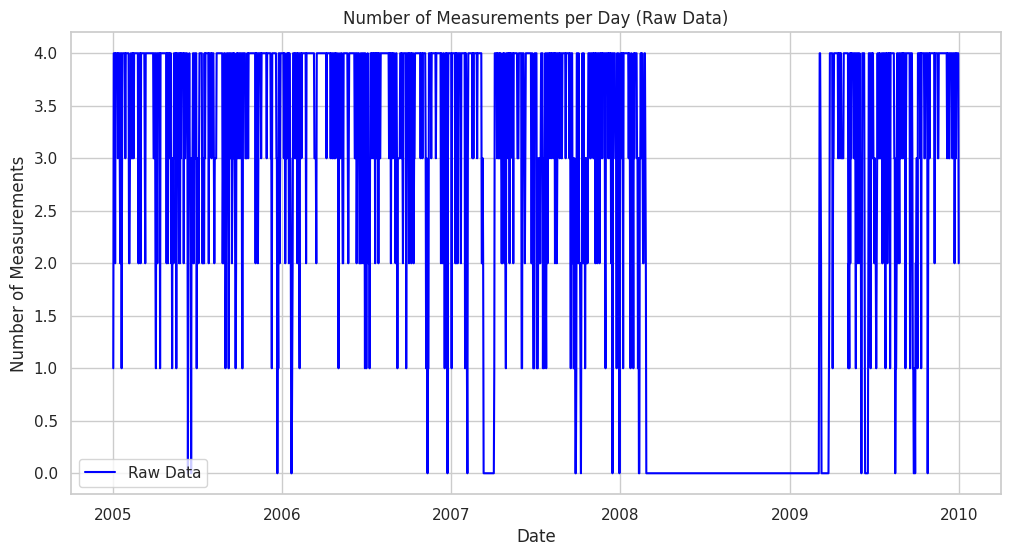

In [15]:
sns.set(color_codes=True)
sns.set(style="whitegrid")
measurements_per_day = df_relevant.groupby(df_relevant['datetime'].dt.date).size().reset_index(name='measurement_count')
# Create a continuous date range spanning the entire period
full_date_range = pd.date_range(start=measurements_per_day['datetime'].min(), end=measurements_per_day['datetime'].max(), freq='D')

# Convert the "datetime" column in the original DataFrame to datetime data type
measurements_per_day['datetime'] = pd.to_datetime(measurements_per_day['datetime'])

# Merge with the actual data and fill missing values with 0
measurements_per_day = pd.DataFrame({'datetime': full_date_range}).merge(measurements_per_day, on='datetime', how='left').fillna(0)

# Plot the raw data
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='measurement_count', data=measurements_per_day, color='blue', label='Raw Data')

# Adding labels and title
plt.title('Number of Measurements per Day (Raw Data)')
plt.xlabel('Date')
plt.ylabel('Number of Measurements')

plt.legend()
plt.show()

### Días sin mediciones - Smoothed data


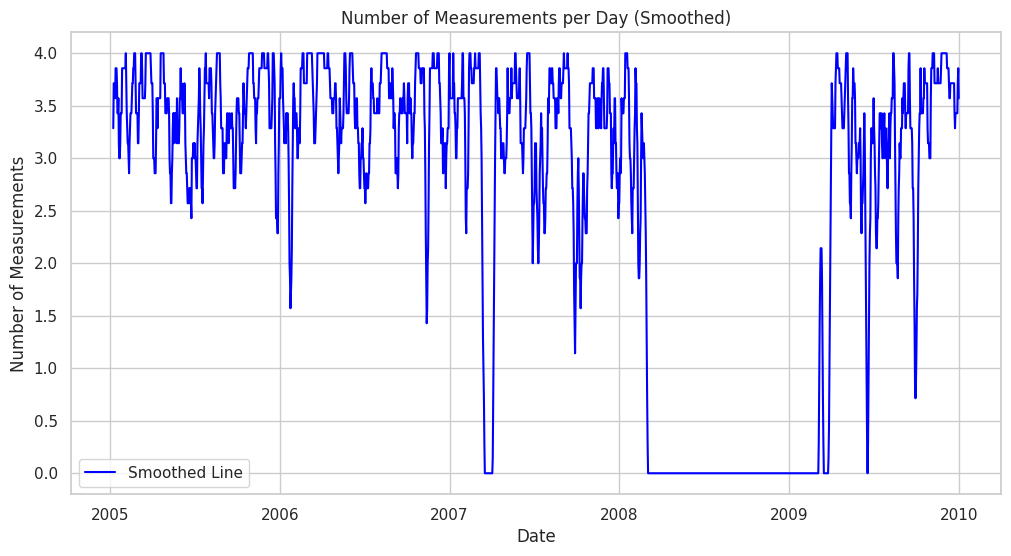

In [16]:
# Smooth the data with a rolling average
window_size = 7  # You can adjust the window size based on your preference
measurements_per_day['measurement_count_smoothed'] = measurements_per_day['measurement_count'].rolling(window=window_size).mean()

# Plot the smoothed line using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='measurement_count_smoothed', data=measurements_per_day, color='blue', label='Smoothed Line')

# Adding labels and title
plt.title('Number of Measurements per Day (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Number of Measurements')

plt.legend()
plt.show()

### Evolución de la energía en el tiempo

<ipython-input-17-25d0483b57f6>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


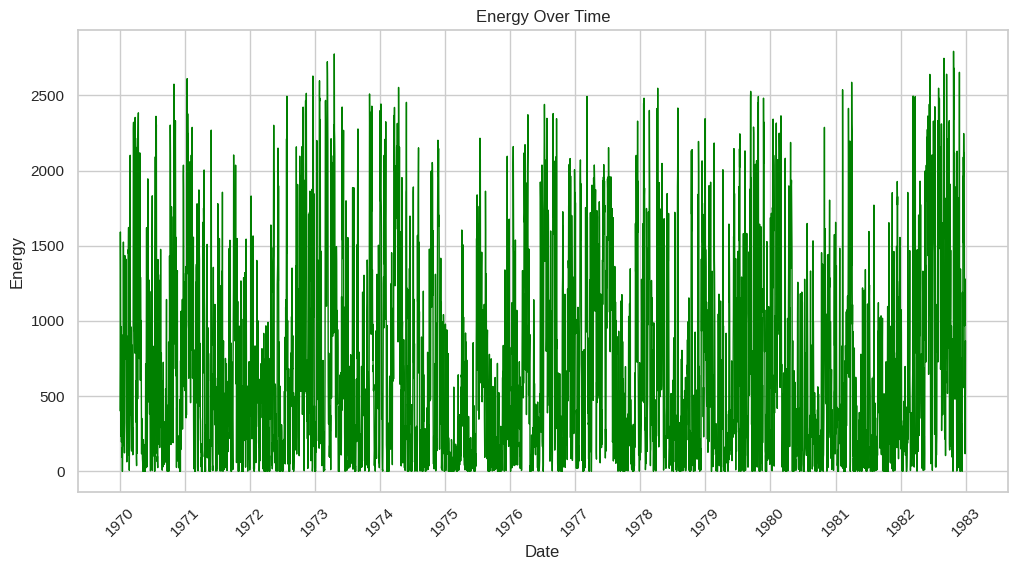

In [17]:
import matplotlib.dates as mdates

# Plotting the energy over time with each day on the x-axis and yearly ticks
plt.figure(figsize=(12, 6))
plt.plot(df_relevant.index, df_relevant['energy'], color='green', linestyle='-', linewidth=1)
plt.title('Energy Over Time')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.grid(True)

# Set the x-axis ticks to display only the years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust plot style
plt.style.use('seaborn-darkgrid')

plt.show()




### Evolución de la energía durante un año (2017)
Se calcula la media de energía para cada día para mostrar un gráfico más suave y comprensible

<ipython-input-18-5446a20db8d4>:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


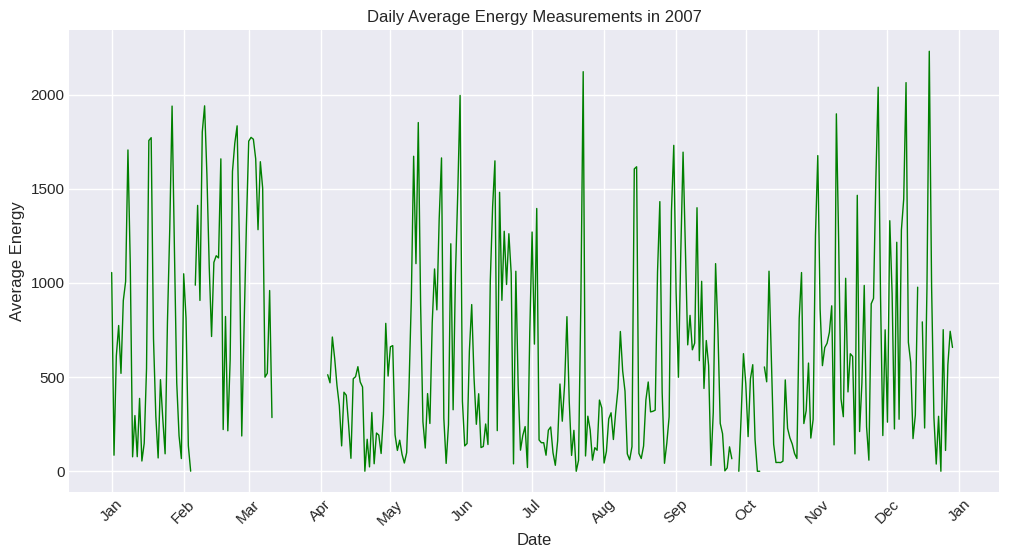

In [18]:
# Filter the data for the year 2007
df_2007 = df_relevant[df_relevant['year'] == 2007]

# Set 'datetime' column as index
df_2007.set_index('datetime', inplace=True)

# Resample the data to get the daily average energy measurement for each day of the year
df_2007_daily_avg = df_2007.resample('D').mean()

# Plotting the daily average energy over time
plt.figure(figsize=(12, 6))
plt.plot(df_2007_daily_avg.index, df_2007_daily_avg['energy'], color='green', linestyle='-', linewidth=1)
plt.title('Daily Average Energy Measurements in 2007')
plt.xlabel('Date')
plt.ylabel('Average Energy')
plt.grid(True)

# Set the x-axis ticks to display only the months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust plot style
plt.style.use('seaborn-darkgrid')

plt.show()


# Evaluación *outer*, *inner* y métrica
Debido a que nos encontramos frente a una serie temporal, hemos decidido usar TimeSeriesSplit para llevar a cabo tanto la outer como la inner evaluation.
Para el outer se usarán 5 splits y para el inner 3, por ser éste el estándar de la industria.
La evaluación outer se utiliza para estimar el rendimiento futuro del modelo en datos no vistos, mientras que la inner se enfoca en el ajuste de hiperparámetros y la comparación de modelos.

La métrica que se va a usar es el rmse ya que nos parece la métrica más fácil de interpretar al estar en las mismas unidades que la variable objetivo.

# Selección de escalador
Inner o outer??

In [19]:
inner_cv = TimeSeriesSplit(n_splits=3)
df_relevant = df_relevant.drop(columns=['datetime']) # si quitamos esto estalla por qué??

X,y = df_relevant.drop(columns=['energy']),df_relevant['energy']

scores = {}
#Min max
pipeline_min_max = Pipeline([
        ('scaler', MinMaxScaler()),
        ('knn', neighbors.KNeighborsRegressor())
    ])

scores_min_max = cross_val_score(pipeline_min_max,X,y,cv = inner_cv,scoring="neg_root_mean_squared_error")
scores["MinMaxScaler"] = -np.mean(scores_min_max)

#Standard
pipeline_standard = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', neighbors.KNeighborsRegressor())
])

scores_std = cross_val_score(pipeline_standard,X,y,cv = inner_cv,scoring="neg_root_mean_squared_error")
scores["StandardScaler"] = -np.mean(scores_std)

#Robust
pipeline_robust = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', neighbors.KNeighborsRegressor())
])

scores_robust = cross_val_score(pipeline_robust,X,y,cv = inner_cv,scoring="neg_root_mean_squared_error")
scores["RobustScaler"] = -np.mean(scores_robust)


print("Para MinMaxScaler, la media de rmse es: ",scores["MinMaxScaler"])
print("Para Standard, la media de rmse es: ",scores["StandardScaler"])
print("Para Robust, la media de rmse es: ",scores["RobustScaler"])


Para MinMaxScaler, la media de rmse es:  545.1412378487257
Para Standard, la media de rmse es:  479.37296174076965
Para Robust, la media de rmse es:  461.2175957436966


La media más baja para el rmse es la del Robust scaler por lo que usaremos ese escalador cuando usemos KNN regressor.


# Modelos

## Hiperparámetros por omisión

INNERS O OUTERS???



### KNN

In [20]:
# KNN con RobustScaler
pipeline_KNN = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', neighbors.KNeighborsRegressor())
])
scores_KNN_hpo = cross_val_score(pipeline_KNN, X, y, cv=inner_cv, scoring="neg_root_mean_squared_error")
score_KNN = -np.mean(scores_KNN_hpo)

print("Estimación de rendimiento de KNN con RobustScaler:", score_KNN)

Estimación de rendimiento de KNN con RobustScaler: 461.2175957436966


### Decission Tree

In [21]:
pipeline_Dec_tree = Pipeline([
    ('decision_tree', DecisionTreeRegressor())
])
scores_Dec_tree_hpo = cross_val_score(pipeline_Dec_tree, X, y, cv=inner_cv, scoring="neg_root_mean_squared_error")
score_Dec_tree = -np.mean(scores_Dec_tree_hpo)

print("Estimación de rendimiento de Decision tree:", score_Dec_tree)

Estimación de rendimiento de Decision tree: 524.528686580497


### Regresión lineal (normal)

In [22]:
from sklearn.linear_model import LinearRegression

pipeline_lRegr = Pipeline([
    ('scaler', RobustScaler()),  # RobustScaler
    ('linear_regression', LinearRegression())  # Linear Regression model
])

scores_lRegr_hpo = cross_val_score(pipeline_lRegr, X, y, cv=inner_cv, scoring="neg_root_mean_squared_error")
scores_lRegr = -np.mean(scores_lRegr_hpo)

print("Estimación de rendimiento de Linear Regression con RobustScaler:", scores_lRegr)

Estimación de rendimiento de Linear Regression con RobustScaler: 565.4292531898157


### Regresión lineal (variante Lasso)

In [23]:
from sklearn.linear_model import Lasso

pipeline_lasso = Pipeline([
    ('scaler', RobustScaler()),  # RobustScaler
    ('lasso', Lasso())  # Lasso Regression model
])

scores_lasso_hpo = cross_val_score(pipeline_lasso, X, y, cv=inner_cv, scoring="neg_root_mean_squared_error")
scores_lasso = -np.mean(scores_lasso_hpo)

print("Estimación de rendimiento de Linear Regression con RobustScaler:", scores_lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.798e+05, tolerance: 5.147e+04
  model = cd_fast.enet_coordinate_descent(


Estimación de rendimiento de Linear Regression con RobustScaler: 563.3518625298816


### Regresión lineal (variante Ridge)

In [24]:
from sklearn.linear_model import Ridge
pipeline_ridge = Pipeline([
    ('scaler', RobustScaler()),  # RobustScaler
    ('lasso', Ridge())  # Lasso Regression model
])

scores_ridge_hpo = cross_val_score(pipeline_ridge, X, y, cv=inner_cv, scoring="neg_root_mean_squared_error")
scores_ridge = -np.mean(scores_ridge_hpo)

print("Estimación de rendimiento de Linear Regression con RobustScaler:", scores_ridge)

Estimación de rendimiento de Linear Regression con RobustScaler: 562.6683522166535


### Regresión lineal (Elastic Net)

In [25]:
from sklearn.linear_model import ElasticNet

pipeline_elastic_net = Pipeline([
    ('scaler', RobustScaler()),  # RobustScaler
    ('elasticnet', ElasticNet())  # Elastic Net Regression model
])

scores_elastic_net_hpo = cross_val_score(pipeline_elastic_net, X, y, cv=inner_cv, scoring="neg_root_mean_squared_error")
scores_elastic_net = -np.mean(scores_elastic_net_hpo)

print("Estimación de rendimiento de Linear Regression con RobustScaler:", scores_elastic_net)

Estimación de rendimiento de Linear Regression con RobustScaler: 575.3478012504667


### SVM

In [26]:
from sklearn.svm import SVR

pipeline_svm = Pipeline([
    ('scaler', RobustScaler()),
    ('svm', SVR())
])

scores_svm_hpo = cross_val_score(pipeline_svm, X, y, cv=inner_cv, scoring="neg_root_mean_squared_error")
scores_svm = -np.mean(scores_svm_hpo)

print("Estimación de rendimiento de Linear Regression con RobustScaler:", scores_svm)

Estimación de rendimiento de Linear Regression con RobustScaler: 685.3721179075523


### Conclusión HPO

Tras ver el error de todos los métodos antes presentados, observamos que el que menor error tiene es el KNN con 461,21.

## Ajuste de hiperparámetros

### KNN con ajuste de hiperparámetros
Inicialmente, knn_neighbours tenía como cota superior 11, pero al ser ésta el mejor hiperparámetro, se tuvo que aumentar el espacio de búsqueda

In [27]:
from sklearn.neighbors import KNeighborsRegressor

outer_cv = TimeSeriesSplit(n_splits=5)
inner_cv = TimeSeriesSplit(n_splits=3)

pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Escalador RobustScaler
    ('knn', KNeighborsRegressor())  # Modelo KNN
])

param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

knn_grid_search = GridSearchCV(pipeline,
                               param_grid_knn,
                               scoring='neg_root_mean_squared_error',
                               cv=inner_cv,
                               n_jobs=1,
                               verbose=1)

inicio = time.time()
knn_scores = cross_validate(knn_grid_search,
                            X, y,
                            scoring='neg_root_mean_squared_error',
                            cv=outer_cv,
                            return_estimator=True)
fin = time.time()


Fitting 3 folds for each of 44 candidates, totalling 132 fits
Fitting 3 folds for each of 44 candidates, totalling 132 fits
Fitting 3 folds for each of 44 candidates, totalling 132 fits
Fitting 3 folds for each of 44 candidates, totalling 132 fits
Fitting 3 folds for each of 44 candidates, totalling 132 fits


In [28]:
media = np.mean(knn_scores["test_score"])
print("La media del error cuadrático medio es:", -media)

# Imprimir los mejores parámetros para cada modelo ajustado
for model in knn_scores["estimator"]:
    #model.fit(X, y)  # mejor con esto o sin esto  IMPORTANTE
    print(model.best_params_)

# Calcular el tiempo transcurrido
tiempo_transcurrido = fin - inicio
print("Tiempo transcurrido en KNN regressor con escalador RobustScaler y configuración de hiperparámetros:", tiempo_transcurrido, "segundos")

La media del error cuadrático medio es: 431.1769417843094
{'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}
{'knn__n_neighbors': 13, 'knn__p': 1, 'knn__weights': 'distance'}
{'knn__n_neighbors': 13, 'knn__p': 1, 'knn__weights': 'distance'}
{'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'distance'}
{'knn__n_neighbors': 21, 'knn__p': 1, 'knn__weights': 'distance'}
Tiempo transcurrido en KNN regressor con escalador RobustScaler y configuración de hiperparámetros: 28.732858419418335 segundos


Construimos el modelo final

In [29]:
knn_grid_search.fit(X,y)

Fitting 3 folds for each of 44 candidates, totalling 132 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19,
                                              21, 23],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error', verbose=1)

### Decision tree con ajuste de hiperparámetros
Aumentamos el espacio de búsqueda *'min_samples_split'* porque al analizar los hiperparámetros ganadores del cross_validate, el valor siempre era 14.

In [30]:
param_grid = {'max_depth': [2, 4, 6, 8, 10, 12, 14],
 'min_samples_split': [8, 10, 12, 14, 16, 18, 20, 22]}

decission_tree = GridSearchCV(DecisionTreeRegressor(random_state=1),
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         # 3-fold for hyper-parameter tuning
                         cv=inner_cv,
                         n_jobs=1, verbose=1,
                        )
inicio = time.time()
scores = cross_validate(decission_tree,
                            X, y,
                            scoring='neg_root_mean_squared_error',
                            cv = outer_cv,
                        return_estimator=True)
fin = time.time()

Fitting 3 folds for each of 56 candidates, totalling 168 fits
Fitting 3 folds for each of 56 candidates, totalling 168 fits
Fitting 3 folds for each of 56 candidates, totalling 168 fits
Fitting 3 folds for each of 56 candidates, totalling 168 fits
Fitting 3 folds for each of 56 candidates, totalling 168 fits


In [31]:
media = np.mean(scores["test_score"])
print("Con optimización de hiperparámetros, para Decision tree la media del mrse es: ", -media)

for model in scores["estimator"]:
  print(model.best_params_)
tiempo_transcurrido = fin - inicio
print("Tiempo transcurrido en DECISION TREE regressor con config de hiperparámetros:", tiempo_transcurrido, "segundos")

Con optimización de hiperparámetros, para Decision tree la media del mrse es:  433.30800466548936
{'max_depth': 4, 'min_samples_split': 20}
{'max_depth': 4, 'min_samples_split': 14}
{'max_depth': 6, 'min_samples_split': 18}
{'max_depth': 4, 'min_samples_split': 14}
{'max_depth': 6, 'min_samples_split': 16}
Tiempo transcurrido en DECISION TREE regressor con config de hiperparámetros: 21.444008350372314 segundos


Construimos el modelo final

In [32]:
decission_tree.fit(X, y)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=DecisionTreeRegressor(random_state=1), n_jobs=1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [8, 10, 12, 14, 16, 18, 20, 22]},
             scoring='neg_root_mean_squared_error', verbose=1)

### Regresión lineal (normal)

In [33]:
param_grid_lr = {
    'linear_regression__fit_intercept': [True, False],
    # que más se puede meter
}

pipeline_lr = Pipeline([
    ('scaler', RobustScaler()),  # RobustScaler
    ('linear_regression', LinearRegression())  # Linear Regression model
])


# Initialize GridSearchCV for Linear Regression
lr_grid_search = GridSearchCV(pipeline_lr,
                              param_grid_lr,
                              scoring='neg_root_mean_squared_error',
                              cv=inner_cv,
                              n_jobs=1,
                              verbose=1)

# Perform outer cross-validation
inicio = time.time()
lr_scores = cross_validate(lr_grid_search,
                           X, y,
                           scoring='neg_root_mean_squared_error',
                           cv=outer_cv,
                           return_estimator=True)
fin = time.time()

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [34]:
# Calculate the mean RMSE
media = np.mean(lr_scores["test_score"])
print("Con optimización de hiperparámetros, para regresión lineal la media del RMSE es:", -media)

print(lr_scores["estimator"])
# Print the best parameters for each model DA ERROR
#for model in lr_scores["estimator"]:
#    print(model.best_params_)

# Calculate the elapsed time
tiempo_transcurrido = fin - inicio
print("Tiempo transcurrido en regresión lineal con optimización de hiperparámetros:", tiempo_transcurrido, "segundos")

Con optimización de hiperparámetros, para regresión lineal la media del RMSE es: 576.2567488034907
[GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('linear_regression',
                                        LinearRegression())]),
             n_jobs=1,
             param_grid={'linear_regression__fit_intercept': [True, False]},
             scoring='neg_root_mean_squared_error', verbose=1), GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('linear_regression',
                                        LinearRegression())]),
             n_jobs=1,
             param_grid={'linear_regression__fit_intercept': [True, False]},
             scoring='neg_root_mean_squared_error', verbose=1), GridSearchCV

### Regresión lineal (variante Lasso)

In [35]:
# Define the parameter grid for Lasso Regression
param_grid_lasso = {
    'lasso__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 10.0],  # Valores para el término de regularización
    'lasso__fit_intercept': [True, False],  # Si ajustar la intersección
    # Otros parámetros específicos del modelo de regresión Lasso pueden ir aquí
}

# Create the pipeline with RobustScaler and Lasso Regression
pipeline_lasso = Pipeline([
    ('scaler', RobustScaler()),  # RobustScaler
    ('lasso', Lasso())  # Lasso Regression model
])

# Initialize GridSearchCV for Lasso Regression
lasso_grid_search = GridSearchCV(pipeline_lasso,
                                 param_grid_lasso,
                                 scoring='neg_root_mean_squared_error',
                                 cv=inner_cv,
                                 n_jobs=1,
                                 verbose=1)

# Perform outer cross-validation
inicio = time.time()
lasso_scores = cross_validate(lasso_grid_search,
                              X, y,
                              scoring='neg_root_mean_squared_error',
                              cv=outer_cv,
                              return_estimator=True)
fin = time.time()

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.800e+07, tolerance: 8.447e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.964e+07, tolerance: 1.777e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.125e+07, tolerance: 2.480e

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.927e+07, tolerance: 3.005e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+07, tolerance: 5.148e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.346e+07, tolerance: 4.118e

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.836e+07, tolerance: 2.483e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.705e+07, tolerance: 5.148e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.822e+07, tolerance: 8.233e

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.946e+07, tolerance: 3.005e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.284e+07, tolerance: 7.500e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.447e+07, tolerance: 1.026e

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.242e+07, tolerance: 3.656e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.830e+07, tolerance: 8.930e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.090e+08, tolerance: 1.315e

In [36]:
# Calculate the mean RMSE
media = np.mean(lasso_scores["test_score"])
print("Con optimización de hiperparámetros, para regresión Lasso la media del RMSE es:", -media)

# Print the best parameters for each model
for model in lasso_scores["estimator"]:
    print(model.best_params_)

# Calculate the elapsed time
tiempo_transcurrido = fin - inicio
print("Tiempo transcurrido en regresión Lasso con optimización de hiperparámetros:", tiempo_transcurrido, "segundos")

Con optimización de hiperparámetros, para regresión Lasso la media del RMSE es: 573.2230619781069
{'lasso__alpha': 1.0, 'lasso__fit_intercept': True}
{'lasso__alpha': 10.0, 'lasso__fit_intercept': True}
{'lasso__alpha': 10.0, 'lasso__fit_intercept': True}
{'lasso__alpha': 3.0, 'lasso__fit_intercept': True}
{'lasso__alpha': 3.0, 'lasso__fit_intercept': True}
Tiempo transcurrido en regresión Lasso con optimización de hiperparámetros: 18.18797779083252 segundos


### Regresión lineal (variante Ridge)



In [37]:
# Define the parameter grid for Ridge Regression
param_grid_ridge = {
    'ridge__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 10.0],  # Values for the regularization term
    'ridge__fit_intercept': [True, False],  # Whether to fit the intercept
    # Other specific parameters for the Ridge Regression model can be added here
}

# Create the pipeline with RobustScaler and Ridge Regression
pipeline_ridge = Pipeline([
    ('scaler', RobustScaler()),  # RobustScaler
    ('ridge', Ridge())  # Ridge Regression model
])

# Initialize GridSearchCV for Ridge Regression
ridge_grid_search = GridSearchCV(pipeline_ridge,
                                 param_grid_ridge,
                                 scoring='neg_root_mean_squared_error',
                                 cv=inner_cv,
                                 n_jobs=1,
                                 verbose=1)

# Perform outer cross-validation
inicio = time.time()
ridge_scores = cross_validate(ridge_grid_search,
                              X, y,
                              scoring='neg_root_mean_squared_error',
                              cv=outer_cv,
                              return_estimator=True)
fin = time.time()

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [38]:
# Calculate the mean RMSE
media = np.mean(ridge_scores["test_score"])
print("Con optimización de hiperparámetros, para regresión Ridge la media del RMSE es:", -media)

# Print the best parameters for each model
for model in ridge_scores["estimator"]:
    print(model.best_params_)

# Calculate the elapsed time
tiempo_transcurrido = fin - inicio
print("Tiempo transcurrido en regresión Ridge con optimización de hiperparámetros:", tiempo_transcurrido, "segundos")

Con optimización de hiperparámetros, para regresión Ridge la media del RMSE es: 574.3036416546827
{'ridge__alpha': 0.1, 'ridge__fit_intercept': True}
{'ridge__alpha': 10.0, 'ridge__fit_intercept': True}
{'ridge__alpha': 10.0, 'ridge__fit_intercept': True}
{'ridge__alpha': 10.0, 'ridge__fit_intercept': True}
{'ridge__alpha': 10.0, 'ridge__fit_intercept': True}
Tiempo transcurrido en regresión Ridge con optimización de hiperparámetros: 6.007229328155518 segundos


### Regresión lineal (Elastic Net)

In [39]:
# Define the parameter grid for Elastic Net Regression
param_grid_elastic_net = {
    'elasticnet__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 10.0],  # Values for the regularization term
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9],  # Mixing parameter, 0 for L2 penalty, 1 for L1 penalty
    'elasticnet__fit_intercept': [True, False],  # Whether to fit the intercept
    # Other specific parameters for the Elastic Net Regression model can be added here
}

# Create the pipeline with RobustScaler and Elastic Net Regression
pipeline_elastic_net = Pipeline([
    ('scaler', RobustScaler()),  # RobustScaler
    ('elasticnet', ElasticNet())  # Elastic Net Regression model
])

# Initialize GridSearchCV for Elastic Net Regression
elastic_net_grid_search = GridSearchCV(pipeline_elastic_net,
                                      param_grid_elastic_net,
                                      scoring='neg_root_mean_squared_error',
                                      cv=inner_cv,
                                      n_jobs=1,
                                      verbose=1)

# Perform outer cross-validation
inicio = time.time()
elastic_net_scores = cross_validate(elastic_net_grid_search,
                                    X, y,
                                    scoring='neg_root_mean_squared_error',
                                    cv=outer_cv,
                                    return_estimator=True)
fin = time.time()

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [40]:
# Calculate the mean RMSE
media = np.mean(elastic_net_scores["test_score"])
print("Con optimización de hiperparámetros, para regresión Ridge la media del RMSE es:", -media)

# Print the best parameters for each model
for model in elastic_net_scores["estimator"]:
    print(model.best_params_)

# Calculate the elapsed time
tiempo_transcurrido = fin - inicio
print("Tiempo transcurrido en regresión Elastic Net con optimización de hiperparámetros:", tiempo_transcurrido, "segundos")

Con optimización de hiperparámetros, para regresión Ridge la media del RMSE es: 608.0766805933101
{'elasticnet__alpha': 10.0, 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': 0.1}
{'elasticnet__alpha': 10.0, 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': 0.1}
{'elasticnet__alpha': 0.1, 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': 0.5}
{'elasticnet__alpha': 0.5, 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': 0.9}
{'elasticnet__alpha': 0.5, 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': 0.9}
Tiempo transcurrido en regresión Elastic Net con optimización de hiperparámetros: 27.991819620132446 segundos


### SVM

In [43]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('svm', SVR())
])

param_grid_svm = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(pipeline,
                               param_grid_svm,
                               scoring='neg_root_mean_squared_error',
                               cv=inner_cv,
                               n_jobs=1,
                               verbose=1)

inicio = time.time()
svm_scores = cross_validate(svm_grid_search,
                            X, y,
                            scoring='neg_root_mean_squared_error',
                            cv=outer_cv,
                            return_estimator=True)
fin = time.time()

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [44]:
# Calcular la media del error cuadrático medio
media = np.mean(-svm_scores["test_score"])
print("La media del error cuadrático medio es:", media)

# Imprimir los mejores parámetros para cada modelo ajustado
for model in svm_scores["estimator"]:
    print(model.best_params_)

# Calcular el tiempo transcurrido
tiempo_transcurrido = fin - inicio
print("Tiempo transcurrido en SVM regressor con escalador RobustScaler y configuración de hiperparámetros:", tiempo_transcurrido, "segundos")

La media del error cuadrático medio es: 456.1586969515747
{'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
{'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
{'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
{'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
{'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Tiempo transcurrido en SVM regressor con escalador RobustScaler y configuración de hiperparámetros: 572.6828217506409 segundos


### Conclusión Ajuste de Hiperparámetros

Tras observar cómo se comportan todos los modelos, se puede identificar que aquel con menor rmse sigue siendo KNN pero esta vez con 431,17 más pequeño que con la omisión de hiperparámetros.

## Conclusiones generales (4.c)


### Mejor método y método más rápido

En conclusión, el mejor método tanto para omisión de hiperparámetros como para ajuste de hiperparámetros es el KNN.
En cuanto al tiempo, en HPO, la ejecución es prácticamente instantánea, sin embargo al ajustar hiperparámetros, al usar grid search para probar todas las posibles combinaciones de hiperparámetros, la complejidad temporal creció bastante, hasta 28 segundos para KNN por ejemplo. Esto tiene sentido ya que en KNN, se debe calcular la distancia de la nueva instancia a clasificar hasta todo el resto de instancias del modelo, lo que tarda bastante.
Por otro lado, otros métodos han sido más rápidos como la regresión normal sin regularización a cual tarda alrededor de 1,54 segundos.
Por lo tanto, podemos decir que el método más rápido es la regresión lineal sin regularización. Por otra parte, el más lento ha sido el SVM ya que ha tardado un total de 572,68 segundos, mucho más que cualquier otro de los métodos utilizados.
Esta alta complejidad temporal que presenta la SVM se debe a que la complejidad computacional al usar kernels no lineales como el rbf (el cual es elegido como mejor parámetro), es muy alta y por ello este incremento en el tiempo.

### Regresor dummy

Para probar el regresor dummy, usaremos la misma lógica que usamos en hpo, hacemos un cross validation (quizás demasiado complejo para lo que queremos calcular) y calcularemos el rmse que nos sale al usar ese dummy regressor

In [45]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")

scores_lRegrDummy_hpo = cross_val_score(dummy_regr, X, y, cv=inner_cv, scoring="neg_root_mean_squared_error")
scores_lRegrDummy = -np.mean(scores_lRegrDummy_hpo)

print("Estimación de rendimiento de Linear Regression con RobustScaler:", scores_lRegrDummy)

Estimación de rendimiento de Linear Regression con RobustScaler: 668.9181131869674


Como se puede observar, a diferencia de la regresión lineal normal, la cual dió un rmse = 565,42, la regresión dummy da 668,91, la cual es más alta, por lo que nuestro modelo es mejor que el Dummy.

### Mejora de HPO a ajuste de hiperparámetros

Por otra parte, en cuanto a la mejora de HPO a ajuste de hiperparámetros, para KNN, decision tree y SVM, el error mejora si ajustamos hiperparámetros. Sin embargo, para todas las regresiones, el error empeora al ajustar hiperparámetros.

### Equilibrio entre tiempo de ejecución y mejora de resultados.

Para KNN, aumentando de un tiempo prácticamente instantáneo a 28 segundos, se reduce el error de 461,21 a 431,17 resultando en una bajada del error de aproximadamente un 6.51%.

Para Decision tree, aumentando el tiempo hasta 21 segundos, se pasa de un error de 565,42 en HPO a 433,3 con ajuste de hiperparámetros. Esto significa una bajada en el error de un 23,4%.

(Regresiones lineales)

Para SVM sin embargo, tiene un muy alto tiempo de cómputo, 572,68 segundos.
Se pasa de un error en HPO de 685,37 a un error con ajuste de hiperparámetros de 456,15. Esto resulta en una bajada del error de un 33,5%.
Esta es la bajada de error más alta que encontramos en los modelos, sin embargo, debido al alto coste temporal que tiene, se tendría que estudiar si merece o no la pena.